In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../scripts")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
plt.rcParams["figure.figsize"] = (14,6)

In [5]:
data = pd.read_hdf("../data/ts-covid-provinces.hdf", key="China")
data

Province   Anhui              Beijing              Chongqing     ... Xinjiang  \
               C  D    I    R       C  D    I    R         C  D  ...        I   
date                                                             ...            
2020-01-28    42  0   42    0      50  0   48    1        59  0  ...        3   
2020-01-29    64  0   64    0      64  0   61    2        79  0  ...        5   
2020-01-30    91  0   91    0      77  0   74    2       104  0  ...        7   
2020-01-31   123  0  122    1      92  0   88    3       130  0  ...        9   
2020-02-01   160  0  158    1     110  0  105    4       157  0  ...       11   
...          ... ..  ...  ...     ... ..  ...  ...       ... ..  ...      ...   
2020-06-05   991  6    0  985     593  9    2  581       579  6  ...        0   
2020-06-06   991  6    0  985     593  9    2  582       579  6  ...        0   
2020-06-07   991  6    0  985     593  9    2  582       579  6  ...        0   
2020-06-08   991  6    0  985     593  9    2  582       579  6  ...        0   
2020-06-09   991  6    0  985     594  9    1  583       579  6  ...        0   

Province       Yunnan             Zhejiang                
             R      C  D   I    R        C  D    I     R  
date                                                      
2020-01-28   0     15  0  15    0       78  0   77     1  
2020-01-29   0     22  0  22    0      119  0  117     1  
2020-01-30   0     32  0  32    0      176  0  174     2  
2020-01-31   0     43  0  43    0      247  0  243     3  
2020-02-01   0     55  0  54    0      323  0  317     6  
...         ..    ... ..  ..  ...      ... ..  ...   ...  
2020-06-05  73    185  2   0  183     1268  1    0  1267  
2020-06-06  73    185  2   0  183     1268  1    0  1267  
2020-06-07  73    185  2   0  183     1268  1    0  1267  
2020-06-08  73    185  2   0  183     1268  1    0  1267  
2020-06-09  73    185  2   0  183     1268  1    0  1267  

[134 rows x 132 columns]

In [6]:
obs = data["Hunan"]
obs = obs[["I", "R", "D"]]
obs

,I,R,D
date,,,
2020-01-28,56,0,0
2020-01-29,87,0,0
2020-01-30,125,0,0
2020-01-31,168,0,0
2020-02-01,217,1,0
...,...,...,...
2020-06-05,0,1015,4
2020-06-06,0,1015,4
2020-06-07,0,1015,4


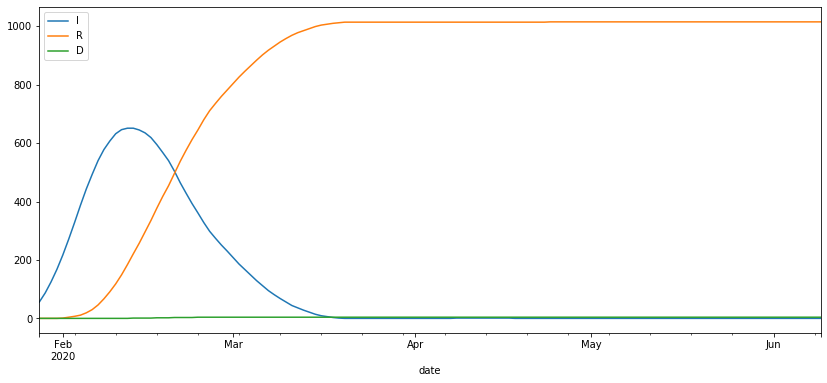

In [7]:
obs.plot()

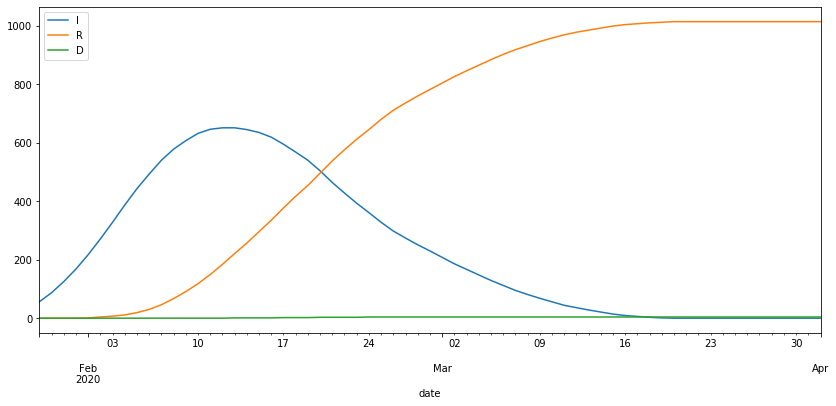

In [8]:
obs = obs[:"2020-04-01"]
obs.plot()

In [9]:
train = obs.iloc[:40]
test = obs.iloc[40:]

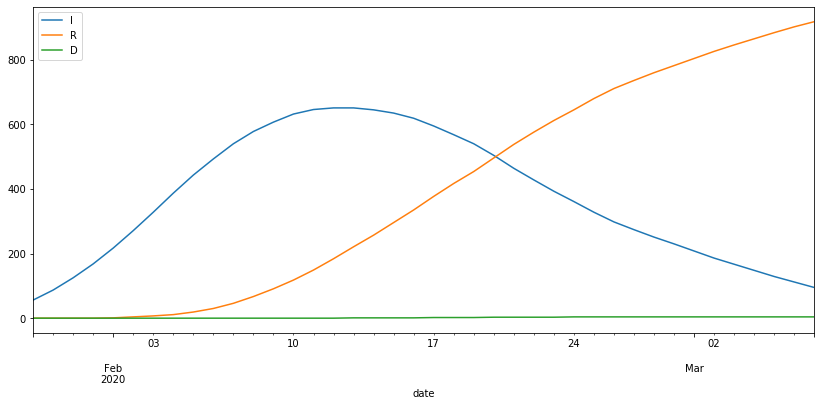

In [10]:
train.plot()

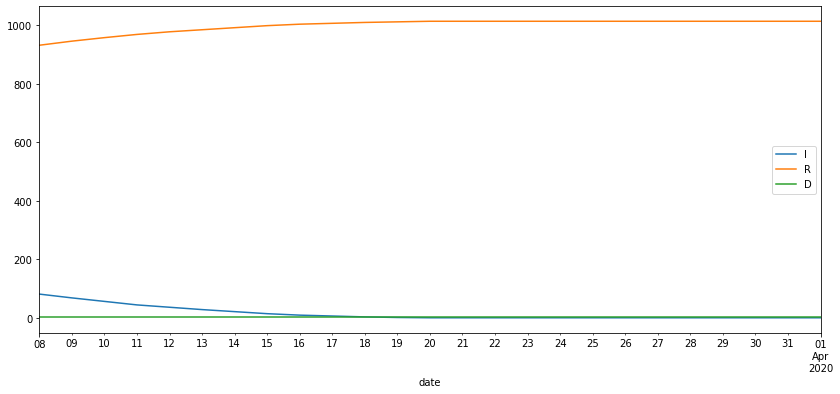

In [11]:
test.plot()

# Piecewise SIR

In [12]:
from SEIR import SIR

In [13]:
init_I, init_R, init_D = train.iloc[0, :]

In [14]:
model = SIR(population = 1e3, init_infected=56, init_recovered=0, init_dead=0)

In [15]:
model.fit_piecewise(train, estimate=('r_transmission', "r_recovery", "r_mortality", "population"), batch_size=7, keep_remainder=True)

----------------------
Batch 0

Fitting...
Simulating...
Done!
----------------------
Batch 1

Fitting...
Simulating...
Done!
----------------------
Batch 2

Fitting...
Simulating...
Done!
----------------------
Batch 3

Fitting...
Simulating...
Done!
----------------------
Batch 4

Fitting...
Simulating...
Done!


In [16]:
pred = model.simulate(len(test))
pred.index = test.index

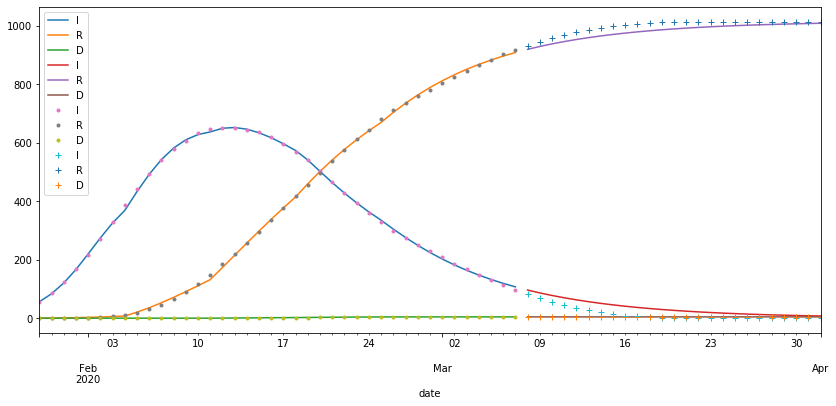

In [17]:
ax = model.y_fit.plot()
pred.plot(ax=ax)
train.plot(ax=ax, style=".")
test.plot(ax=ax, style="+")

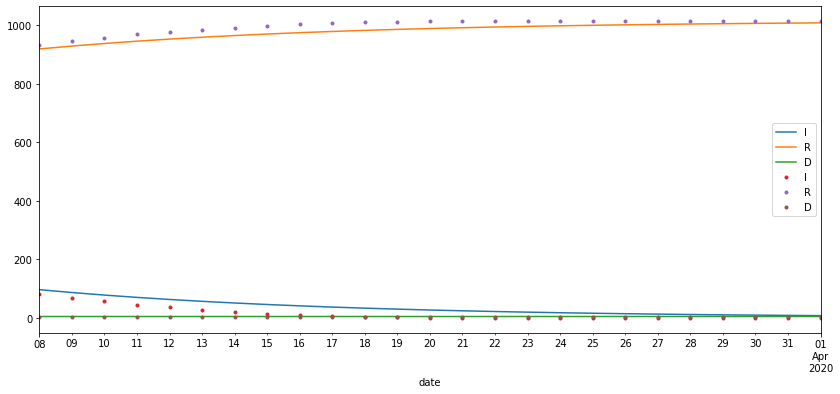

In [18]:
ax = pred.plot()
test.plot(ax=ax, style=".")

In [19]:
model.piecewise_params

,population,r_transmission,r_recovery,r_mortality
0,488.252351,0.468912,0.005233,-4.974418e-05
1,863.378973,0.372740,0.032781,-2.569869e-08
2,1063.598954,0.335444,0.064268,4.707697e-04
3,1008.384140,2.183554,0.080950,6.961938e-04
4,1020.321399,1.381193,0.107645,5.217514e-05


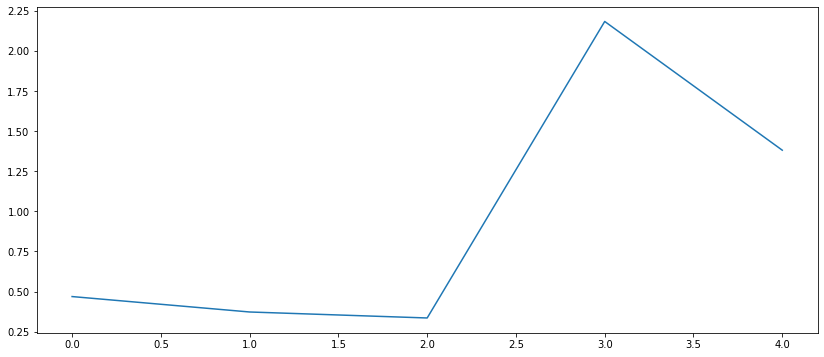

In [20]:
model.piecewise_params.r_transmission.plot()

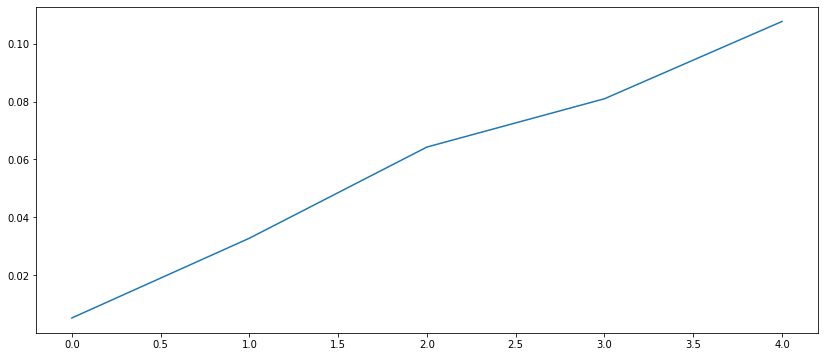

In [21]:
model.piecewise_params.r_recovery.plot()

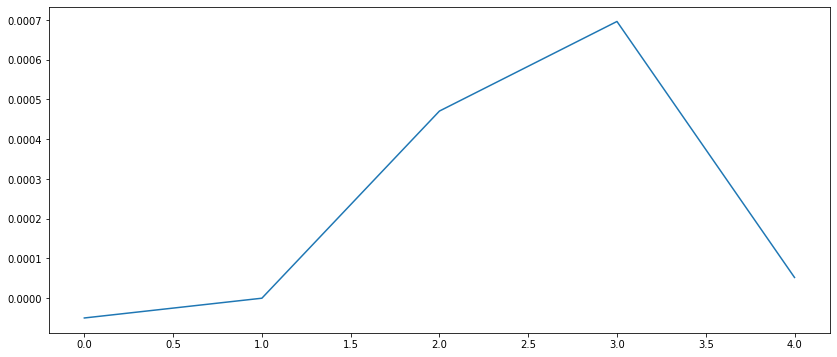

In [22]:
model.piecewise_params.r_mortality.plot()